# Who Got Vaxxed?  Predicting Vaccination Likliehood

<img src="images/header.webp">

# Business Understanding
## Project Overview

Public health is crucial and a big factor of public helath is vaccination.  This project aims to predict if individuals received the H1N1 and seasonal flu vaccines using data from the National 2009 H1N1 Flu Survey.  

## Real-World Problem

Understand factors that lead to people choosing to get a vaccinated against H1N1 and seasonal flu. Increasing uptake of vaccination will allow the public to be more innocuated against the adverse effects of both H1N1 and seasonal flu, and save lives.

## Stakeholders

The primary stakeholders for this project include public health officials, policymakers, organizations for vaccination and the public. Insights into the factors that drive vaccination behavior can benefit everyone. Insights into vaccination behavior can better communication strategies and lead to less people getting sick.

## Business Questions

This project will address the following key questions to provide actionable insights: 
**(WIP THIS LIST IS STAND IN)**

1. What features in the data set most impact people's decision to get vaccinated for both H1N1 and Seasonal Flu?
2. What models best predict people's likeliehood to get vaccinated?
3. Which groups are most and least likely to get vaccinated, and what targeted strategies can increase their vaccination rates?


# Imports

In [43]:
#%load_ext cudf.pandas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from math import ceil
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load Data

In [44]:
test_set_features = pd.read_csv("data/test_set_features.csv", index_col="respondent_id")
features_df = pd.read_csv("data/training_set_features.csv", index_col="respondent_id")
labels_df = pd.read_csv("data/training_set_labels.csv", index_col="respondent_id")

In [45]:
test_set_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [46]:
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [47]:
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


We weren't given the labels for the test set and the forums for the data set said this was intentional they have the labels for it on their side for testing and we aren't allowed to see or use them.

We're supposed to test train split on the test data so we have our own validation set.

This makes the test data only usable if we did unsupervised learning so lets just drop it for now.

In [48]:
del test_set_features


# Data Understanding

The dataset used for this project comes from the National 2009 H1N1 Flu Survey.  Below is a description of the data's features.

### Target Variables

- **h1n1_vaccine**: Whether respondent received H1N1 flu vaccine. (0 = No, 1 = Yes)
- **seasonal_vaccine**: Whether respondent received seasonal flu vaccine. (0 = No, 1 = Yes)

### Dataset Features

| Feature Name               | Feature Data Type      | Feature Values                                                | Feature Description                                                                                                                                                               |
|----------------------------|------------------------|----------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| h1n1_concern               | Encoded Categorical    | 0 = Not at all concerned, 1 = Not very concerned, 2 = Somewhat concerned, 3 = Very concerned | Level of concern about the H1N1 flu.                                                                                                                                              |
| h1n1_knowledge             | Encoded Categorical    | 0 = No knowledge, 1 = A little knowledge, 2 = A lot of knowledge | Level of knowledge about H1N1 flu.                                                                                                                                              |
| behavioral_antiviral_meds  | Binary                 |                                                                | Has taken antiviral medications.                                                                                                                                                   |
| behavioral_avoidance       | Binary                 |                                                                | Has avoided close contact with others with flu-like symptoms.                                                                                                                      |
| behavioral_face_mask       | Binary                 |                                                                | Has bought a face mask.                                                                                                                                                            |
| behavioral_wash_hands      | Binary                 |                                                                | Has frequently washed hands or used hand sanitizer.                                                                                                                                |
| behavioral_large_gatherings| Binary                 |                                                                | Has reduced time at large gatherings.                                                                                                                                              |
| behavioral_outside_home    | Binary                 |                                                                | Has reduced contact with people outside of own household.                                                                                                                          |
| behavioral_touch_face      | Binary                 |                                                                | Has avoided touching eyes, nose, or mouth.                                                                                                                                         |
| doctor_recc_h1n1           | Binary                 |                                                                | H1N1 flu vaccine was recommended by doctor.                                                                                                                                        |
| doctor_recc_seasonal       | Binary                 |                                                                | Seasonal flu vaccine was recommended by doctor.                                                                                                                                    |
| chronic_med_condition      | Binary                 |                                                                | Has any of the following chronic medical conditions: asthma or another lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. |
| child_under_6_months       | Binary                 |                                                                | Has regular close contact with a child under the age of six months.                                                                                                                |
| health_worker              | Binary                 |                                                                | Is a healthcare worker.                                                                                                                                                            |
| health_insurance           | Binary                 |                                                                | Has health insurance.                                                                                                                                                              |
| opinion_h1n1_vacc_effective| Encoded Categorical    | 1 = Not at all effective, 2 = Not very effective, 3 = Don't know, 4 = Somewhat effective, 5 = Very effective | Respondent's opinion about H1N1 vaccine effectiveness.                                                                                                                             |
| opinion_h1n1_risk          | Encoded Categorical    | 1 = Very Low, 2 = Somewhat low, 3 = Don't know, 4 = Somewhat high, 5 = Very high | Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.                                                                                                     |
| opinion_h1n1_sick_from_vacc| Encoded Categorical    | 1 = Not at all worried, 2 = Not very worried, 3 = Don't know, 4 = Somewhat worried, 5 = Very worried | Respondent's worry of getting sick from taking H1N1 vaccine.                                                                                                                       |
| opinion_seas_vacc_effective| Encoded Categorical    | 1 = Not at all effective, 2 = Not very effective, 3 = Don't know, 4 = Somewhat effective, 5 = Very effective | Respondent's opinion about seasonal flu vaccine effectiveness.                                                                                                                     |
| opinion_seas_risk          | Encoded Categorical    | 1 = Very Low, 2 = Somewhat low, 3 = Don't know, 4 = Somewhat high, 5 = Very high | Respondent's opinion about risk of getting sick with seasonal flu without vaccine.                                                                                                 |
| opinion_seas_sick_from_vacc| Encoded Categorical    | 1 = Not at all worried, 2 = Not very worried, 3 = Don't know, 4 = Somewhat worried, 5 = Very worried | Respondent's worry of getting sick from taking seasonal flu vaccine.                                                                                                               |
| age_group                  | Categorical            | | Age group of respondent.                                                                                                                                                           |
| education                  | Categorical            | | Self-reported education level.                                                                                                                                                     |
| race                       | Categorical            | | Race of respondent.                                                                                                                                                                |
| sex                        | Categorical            | | Sex of respondent.                                                                                                                                                                 |
| income_poverty             | Categorical            | | Household annual income of respondent with respect to 2008 Census poverty thresholds.                                                                                              |
| marital_status             | Categorical            | | Marital status of respondent.                                                                                                                                                      |
| rent_or_own                | Categorical            | | Housing situation of respondent.                                                                                                                                                   |
| employment_status          | Categorical            | | Employment status of respondent.                                                                                                                                                   |
| hhs_geo_region             | Categorical            | | Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services.                                                         |
| census_msa                 | Categorical            | | Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.                                                                                   |
| household_adults           | Numerical              | 0, 1, 2, 3                                                    | Number of other adults in household, top-coded to 3.                                                                                                                               |
| household_children         | Numerical              | 0, 1, 2, 3                                                    | Number of children in household, top-coded to 3.                                                                                                                                   |
| employment_industry        | Categorical            | | Type of industry respondent is employed in.                                                                                                                                        |
| employment_occupation      | Categorical            | | Type of occupation of respondent.                                                                                                                                                   |



## EDA

### .info

In [49]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

In [50]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


### .isna()

In [51]:
print("features_df: (Length:",str(len(features_df))+")")
print(features_df.isna().sum(),"\n\n")
print("labels_df: (Length:",str(len(labels_df))+")")
print(labels_df.isna().sum())

features_df: (Length: 26707)
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_s

In [52]:
features_df.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


### Strings for binary encoding

In [53]:
features_df["marital_status"].value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

In [54]:
features_df["rent_or_own"].value_counts()

rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64

### Strings with 3 categories

In [55]:
features_df["income_poverty"].value_counts()

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [56]:
features_df["employment_status"].value_counts()

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [57]:
features_df["census_msa"].value_counts()

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

### Strings with many categories

In [58]:
features_df["employment_occupation"].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

In [59]:
features_df["hhs_geo_region"].value_counts()

hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: count, dtype: int64

In [60]:
features_df["employment_industry"].value_counts()

employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64

In [61]:
features_df["employment_occupation"].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

### Labels
Lets explore the labels, first we'll see if the classes are unbalanced

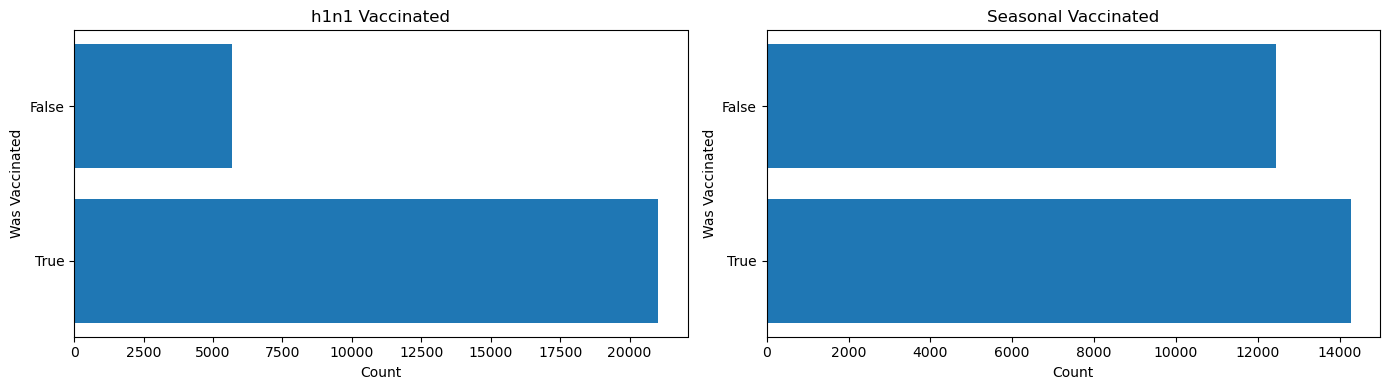

In [62]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
value_counts = labels_df['h1n1_vaccine'].value_counts()
ax[0].barh(['True','False'],value_counts.values)
ax[0].set_title('h1n1 Vaccinated')
ax[0].set_ylabel('Was Vaccinated')
ax[0].set_xlabel('Count')

value_counts = labels_df['seasonal_vaccine'].value_counts()
ax[1].barh(['True','False'],value_counts.values)
ax[1].set_title('Seasonal Vaccinated')
ax[1].set_ylabel('Was Vaccinated')
ax[1].set_xlabel('Count')
plt.tight_layout()
plt.show()

h1n1 is definitely very unbalanced, seasonal is much less so.  We might have to use SMOTE for h1n1 and but seasonal might be ok as is.

next lets check for correlation!

In [63]:
labels_df["h1n1_vaccine"].corr(labels_df["seasonal_vaccine"])

0.37714265306144557

It seems there is some correlation, but these days both flus are given at the same time in the same shot.
In 2009 the H1N1 was created.  The flu shots were given at a similar time.  So we can't use either to predict the other or we'd get data leakage.

It seems there is a story here, a lot more people got the seasonal vaccine.
If they got one there was more chance they got both then if they didn't get the seasonal.


### Non-processed Histograms


In [64]:
uniq_dict = {}
for column in features_df.columns:
    uniq_dict[column] = features_df[column].nunique()
uniq_dict

{'h1n1_concern': 4,
 'h1n1_knowledge': 3,
 'behavioral_antiviral_meds': 2,
 'behavioral_avoidance': 2,
 'behavioral_face_mask': 2,
 'behavioral_wash_hands': 2,
 'behavioral_large_gatherings': 2,
 'behavioral_outside_home': 2,
 'behavioral_touch_face': 2,
 'doctor_recc_h1n1': 2,
 'doctor_recc_seasonal': 2,
 'chronic_med_condition': 2,
 'child_under_6_months': 2,
 'health_worker': 2,
 'health_insurance': 2,
 'opinion_h1n1_vacc_effective': 5,
 'opinion_h1n1_risk': 5,
 'opinion_h1n1_sick_from_vacc': 5,
 'opinion_seas_vacc_effective': 5,
 'opinion_seas_risk': 5,
 'opinion_seas_sick_from_vacc': 5,
 'age_group': 5,
 'education': 4,
 'race': 4,
 'sex': 2,
 'income_poverty': 3,
 'marital_status': 2,
 'rent_or_own': 2,
 'employment_status': 3,
 'hhs_geo_region': 10,
 'census_msa': 3,
 'household_adults': 4,
 'household_children': 4,
 'employment_industry': 21,
 'employment_occupation': 23}

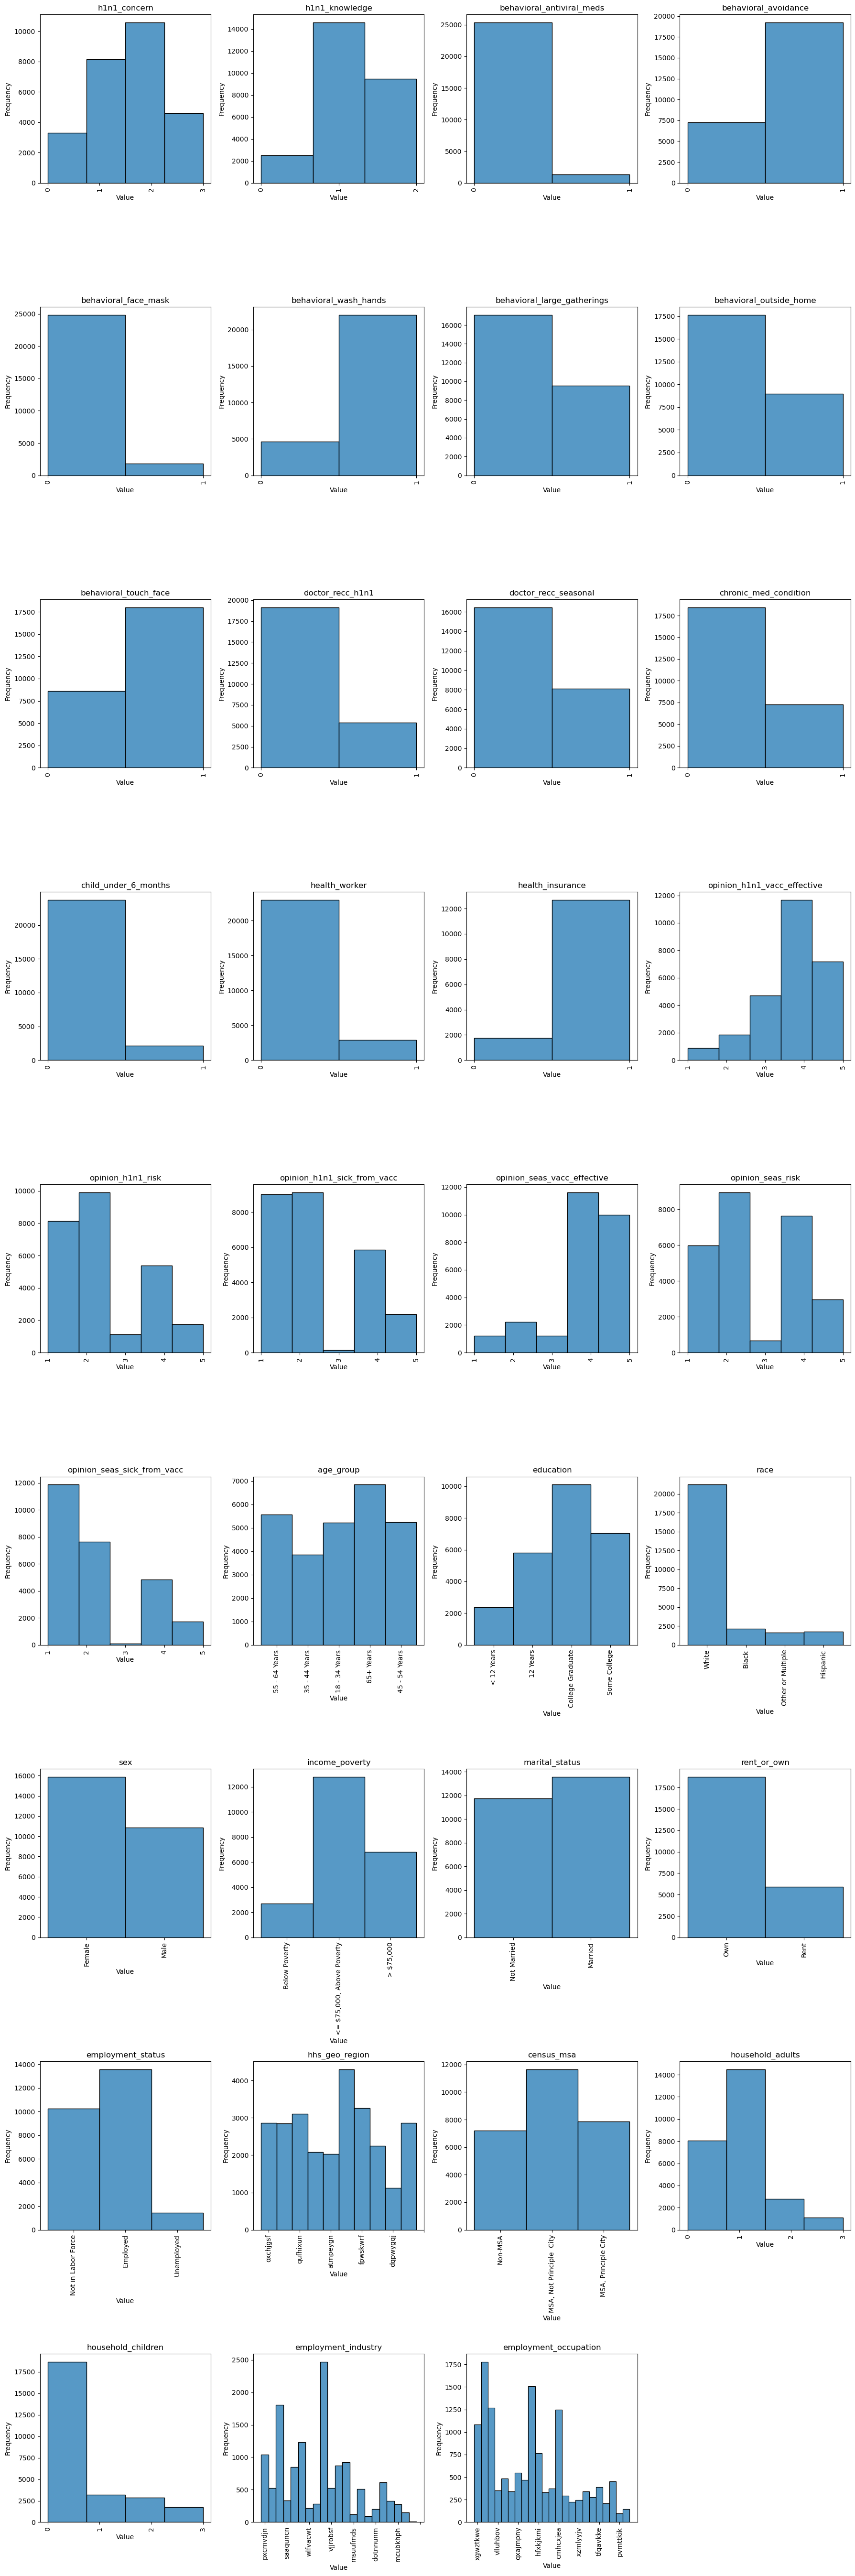

In [65]:
num_plots = len(uniq_dict)
num_cols = 4
num_rows = ceil(num_plots / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))

for ax, (key, value) in zip(axs.flatten(), uniq_dict.items()):
    sns.histplot(features_df[key], bins=value, ax=ax)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.set_title(key)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=90)

# If the number of plots is not a perfect multiple of num_cols, hide the extra subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

### Features
We'll go ahead and graph all the features and just get a nice quick visual overview

In [66]:

all_df = pd.concat([features_df,labels_df],axis=1)
all_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


#### Column Data Types
There's not so many cols we can't just categorize them by hand so here we go

In [67]:
encoded_categorical_cols = [
    'h1n1_concern', 
    'h1n1_knowledge', 
    'opinion_h1n1_vacc_effective', 
    'opinion_h1n1_risk', 
    'opinion_h1n1_sick_from_vacc', 
    'opinion_seas_vacc_effective', 
    'opinion_seas_risk', 
    'opinion_seas_sick_from_vacc'
]
binary_cols = [
    'behavioral_antiviral_meds', 
    'behavioral_avoidance', 
    'behavioral_face_mask', 
    'behavioral_wash_hands', 
    'behavioral_large_gatherings', 
    'behavioral_outside_home', 
    'behavioral_touch_face', 
    'doctor_recc_h1n1', 
    'doctor_recc_seasonal', 
    'chronic_med_condition', 
    'child_under_6_months', 
    'health_worker', 
    'health_insurance'
]
categorical_cols = [
    'age_group', 
    'education', 
    'race', 
    'sex', 
    'income_poverty', 
    'marital_status', 
    'rent_or_own', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa', 
    'employment_industry', 
    'employment_occupation'
]
numeric_cols = [
    'household_adults', 
    'household_children'
]

#this will let make the labels better 
map_dict = {
    'h1n1_concern': {
        0: "Not at all concerned",
        1: "Not very concerned",
        2: "Somewhat concerned",
        3: "Very concerned"
    },
    'h1n1_knowledge': {
        0: "No knowledge",
        1: "A little knowledge",
        2: "A lot of knowledge"
    },
    'opinion_h1n1_vacc_effective': {
        1: "Not at all effective",
        2: "Not very effective",
        3: "Don't know",
        4: "Somewhat effective",
        5: "Very effective"
    },
    'opinion_h1n1_risk': {
        1: "Very Low",
        2: "Somewhat low",
        3: "Don't know",
        4: "Somewhat high",
        5: "Very high"
    },
    'opinion_h1n1_sick_from_vacc': {
        1: "Not at all worried",
        2: "Not very worried",
        3: "Don't know",
        4: "Somewhat worried",
        5: "Very worried"
    },
    'opinion_seas_vacc_effective': {
        1: "Not at all effective",
        2: "Not very effective",
        3: "Don't know",
        4: "Somewhat effective",
        5: "Very effective"
    },
    'opinion_seas_risk': {
        1: "Very Low",
        2: "Somewhat low",
        3: "Don't know",
        4: "Somewhat high",
        5: "Very high"
    },
    'opinion_seas_sick_from_vacc': {
        1: "Not at all worried",
        2: "Not very worried",
        3: "Don't know",
        4: "Somewhat worried",
        5: "Very worried"
    }
}

Now we need to go ahead and figure out how best to visualize all of these based on their data types

In [68]:
def feature_vs_label(target,col):
    stacked_df = (all_df[[target, col]]
                .groupby([target, col])
                .size()
                .unstack(target)
            )
    return stacked_df

In [69]:
f = numeric_cols[0]
feature_vs_label('h1n1_vaccine',f)

h1n1_vaccine,0,1
household_adults,,
0.0,6471,1585
1.0,11209,3265
2.0,2240,563
3.0,903,222


In [70]:
label_cols = ['h1n1_vaccine','seasonal_vaccine']
feature_vaxrate_std = {}
def plot_features(cols):
    numfeatures = len(cols) * len(label_cols)
    numcols = 2
    numrows = (numfeatures + numcols - 1) // numcols
    numrows = max(1, numrows)
    display(numrows)

    figsizey = 6 * numrows
    fig, ax = plt.subplots(numrows,numcols,figsize=(18,figsizey))
    ax = ax.flatten()

    count = 0

    l = 'h1n1_vaccine'
    for f in cols:
        for l in label_cols:
            stacked_df = feature_vs_label(l,f)
            stacked_df.plot(kind='barh', stacked=True,ax=ax[count])
            ax[count].set_xlabel('Count')
            ax[count].set_ylabel(f)
            ax[count].set_title(f"{f} vs {l}")

            variances = []
            # Set xlim to add padding to the right
            current_xlim = ax[count].get_xlim()[1]
            ax[count].set_xlim(0, current_xlim * 1.07)
            # Annotate with percentages
            for i in range(stacked_df.shape[0]):
                v0 = stacked_df.iloc[i, 0]
                v1 = stacked_df.iloc[i, 1]
                total = v0 + v1
                percentage = (v1 / total) * 100 if total != 0 else 0
                ax[count].text(v0 + v1 + total * 0.01, i, f'{percentage:.1f}%', color='black', va='center')
                variances.append(percentage)
            variances_df = pd.DataFrame(variances)
            feature_vaxrate_std[f"{f}_{l}"] = variances_df.std()[0]

            count+=1

    plt.tight_layout()
    plt.show()

#### Plot Numeric Features

2

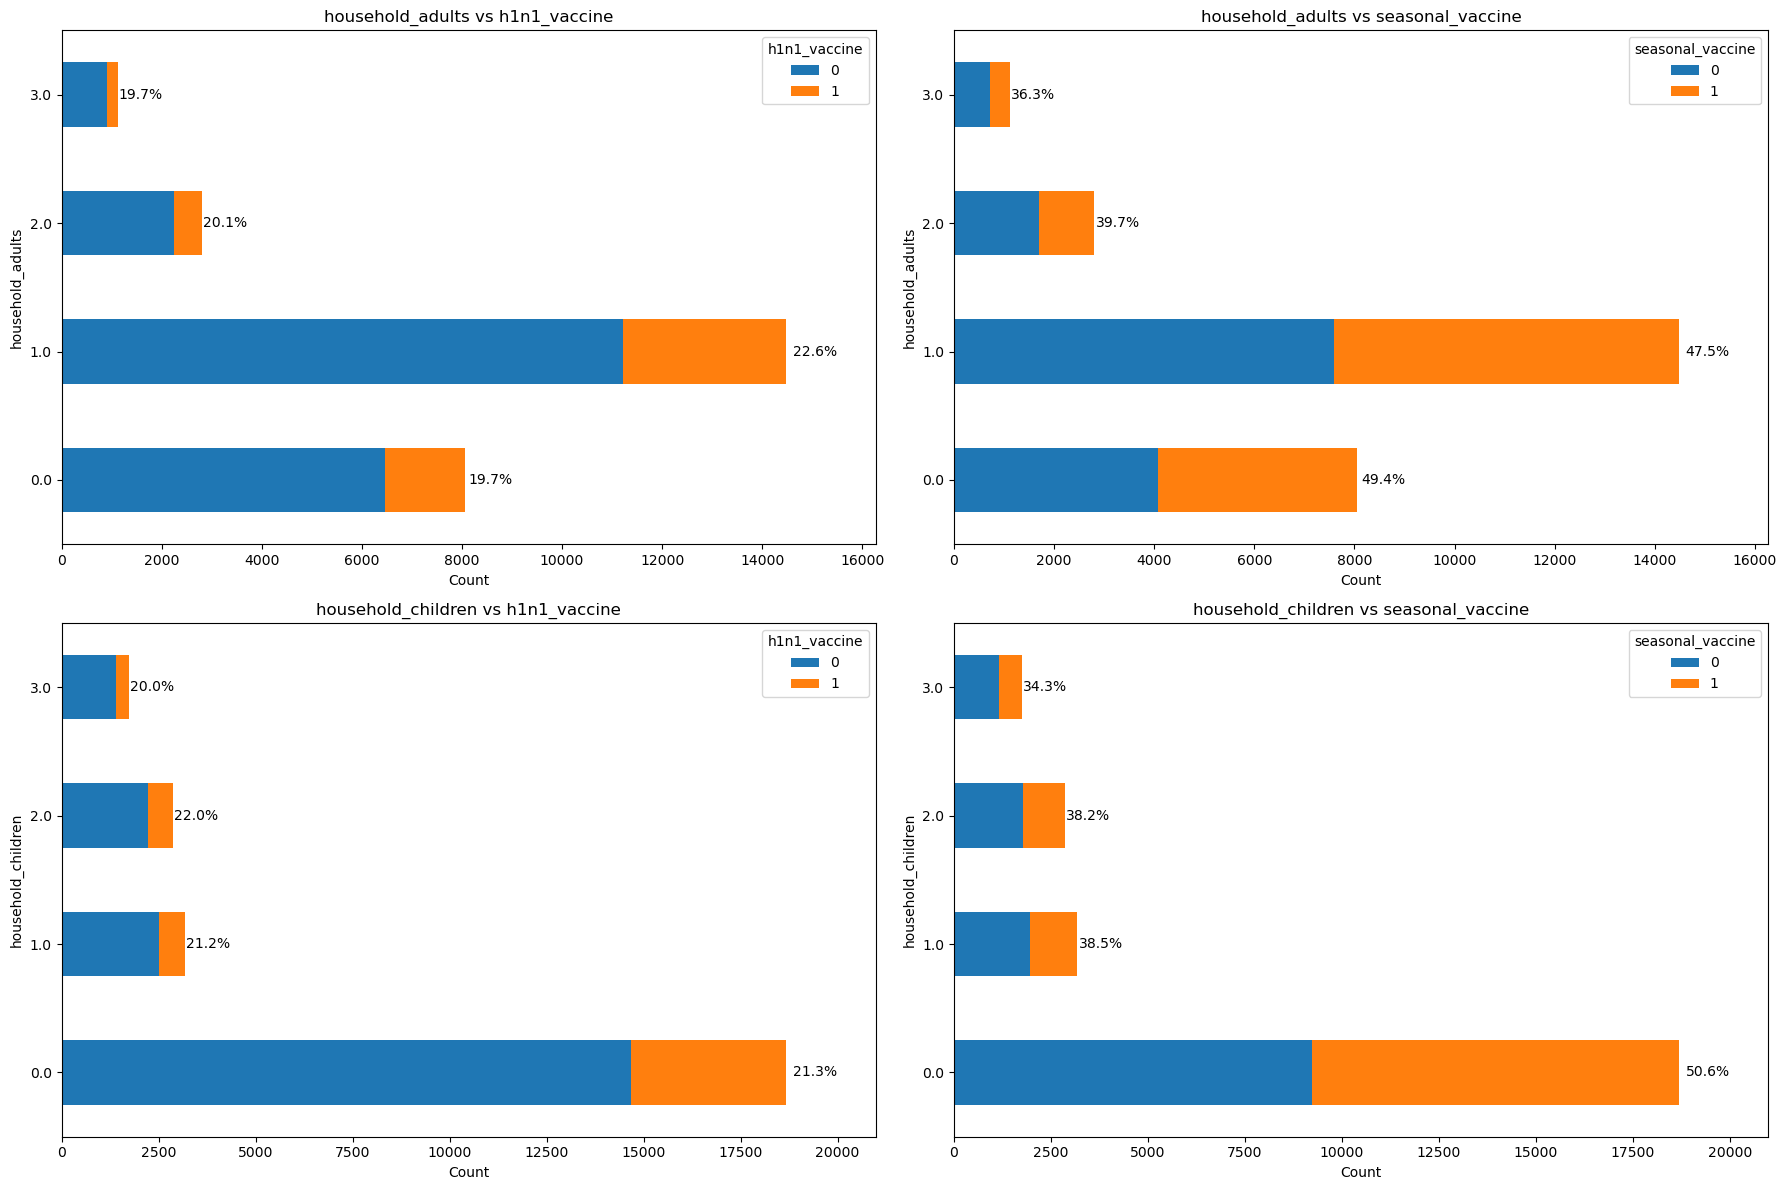

In [71]:
plot_features(numeric_cols)

#### Plot Binary Features

13

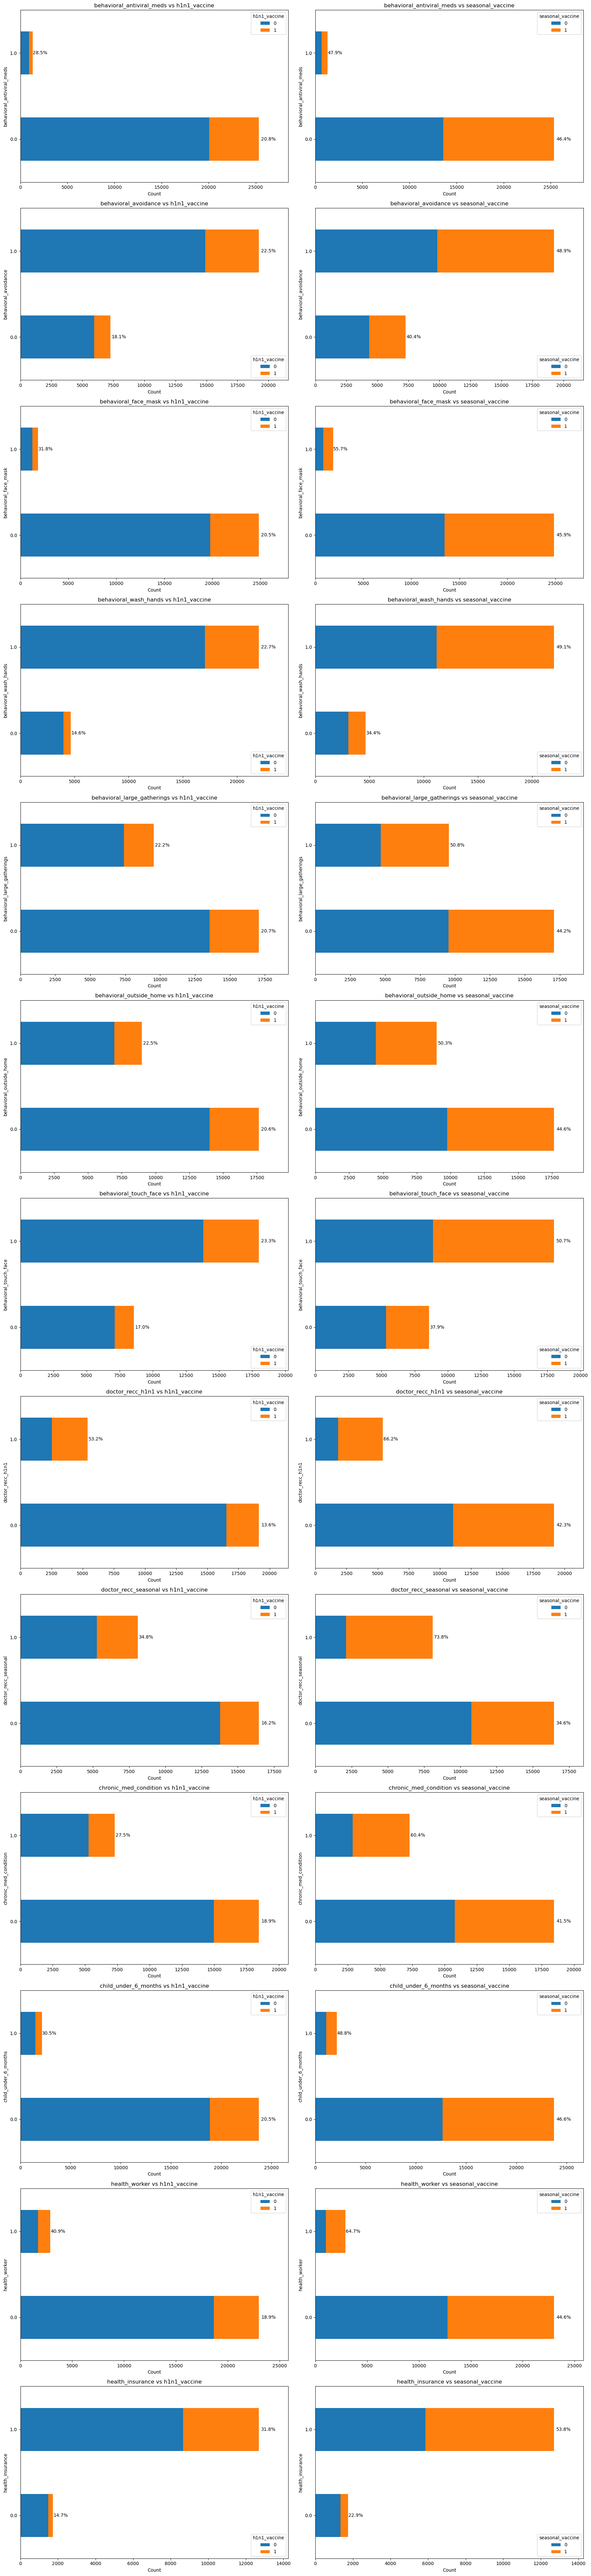

In [72]:
plot_features(binary_cols)

#### Plot Categorical Features

12

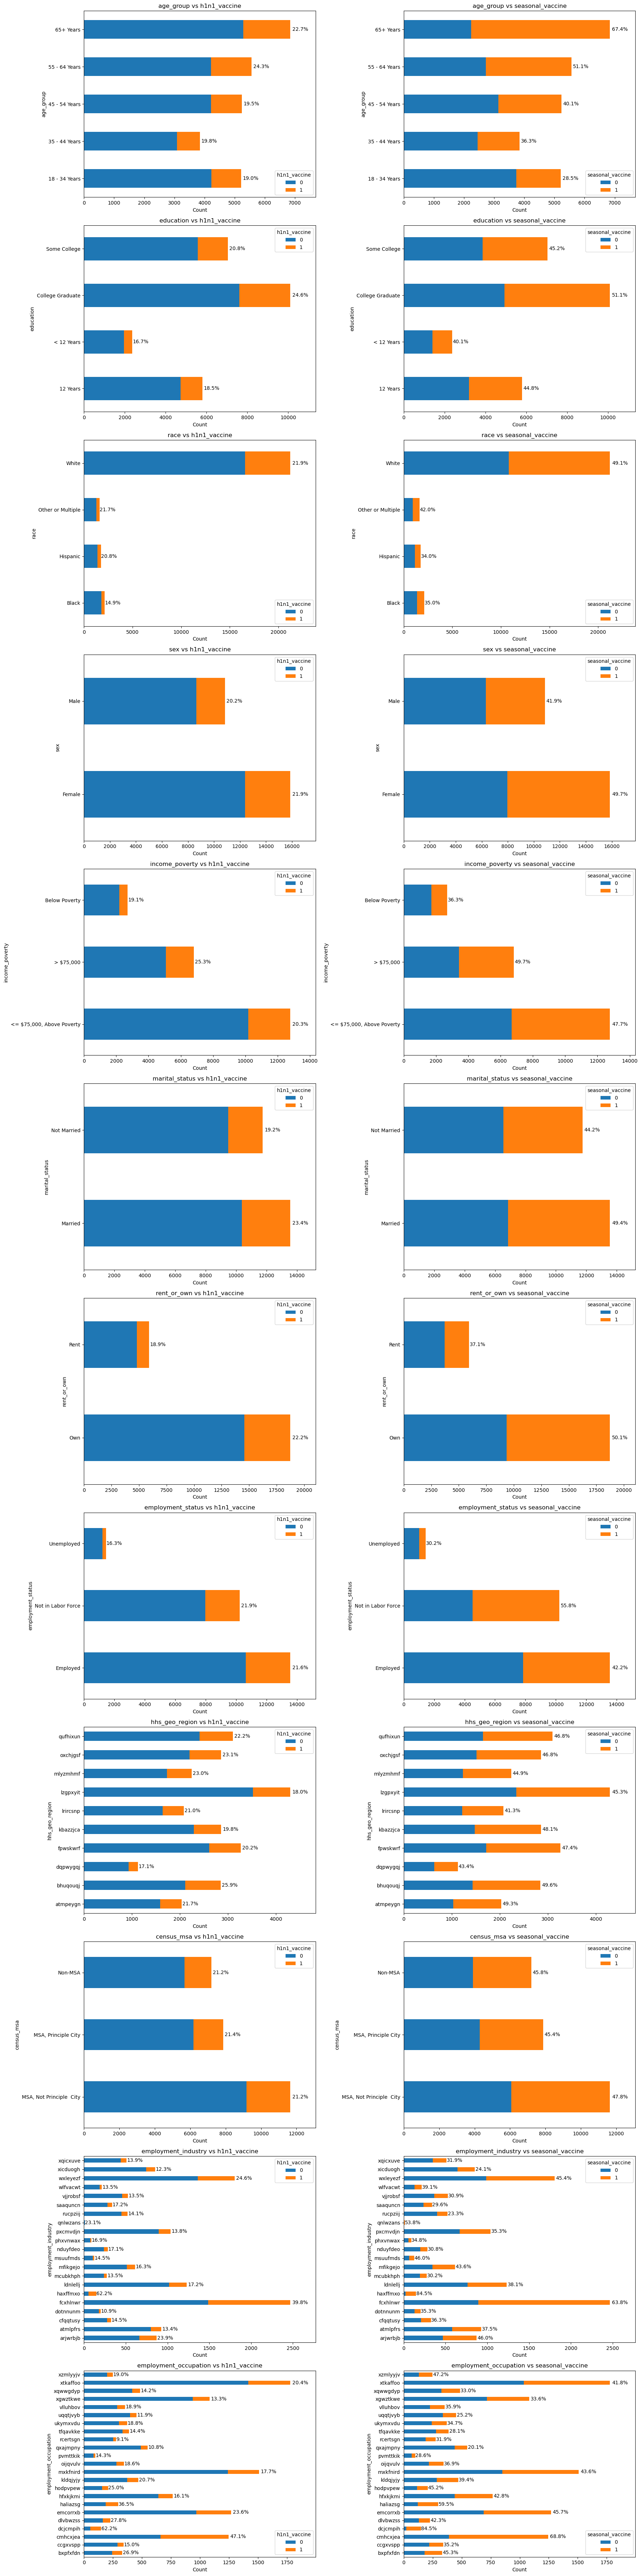

In [73]:
plot_features(categorical_cols)

#### Plot Encoded Categorical Features

8

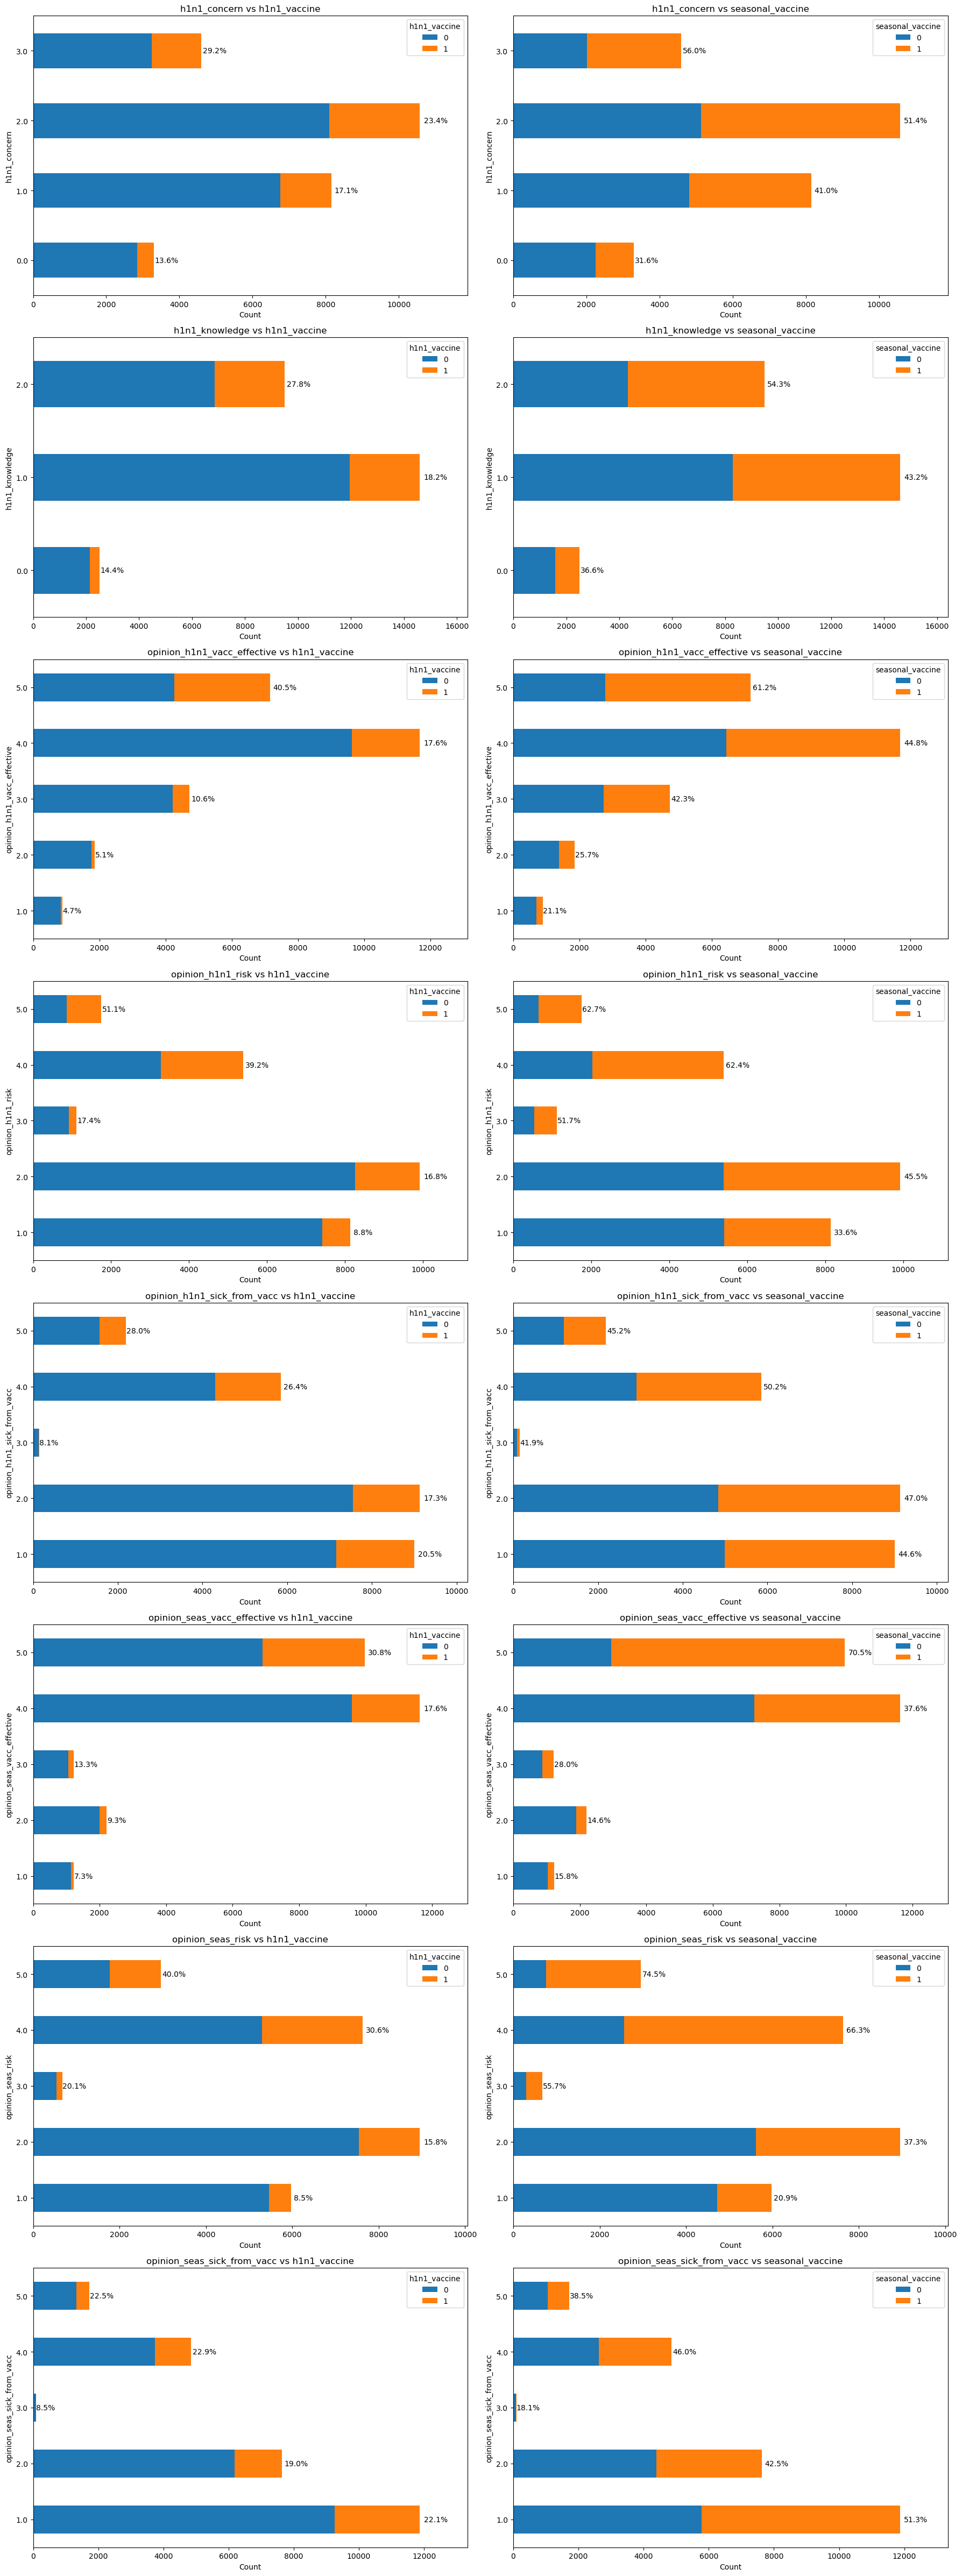

In [74]:
#TODO use map_dict to make it so the y labels are what the encoded variable means
plot_features(encoded_categorical_cols)


#### Sorted Feature STD
This stat indicates (not tells) to us which might be the most predictive features!  
The higher the standard deviation, the more likeliehood changed based on the features values
It's not a perfect indicator but it's still very helpful!

In [75]:
sorted_feature_vaxrate_std = dict(sorted(feature_vaxrate_std.items(), key=lambda item: item[1], reverse=True))

In [76]:
sorted_feature_vaxrate_std

{'doctor_recc_h1n1_h1n1_vaccine': 28.00062994151647,
 'doctor_recc_seasonal_seasonal_vaccine': 27.731963742216152,
 'opinion_seas_vacc_effective_seasonal_vaccine': 22.83866596149059,
 'health_insurance_seasonal_vaccine': 21.831103733267415,
 'opinion_seas_risk_seasonal_vaccine': 21.791005016217483,
 'opinion_h1n1_risk_h1n1_vaccine': 17.716726356220235,
 'doctor_recc_h1n1_seasonal_vaccine': 16.92200580713111,
 'opinion_h1n1_vacc_effective_seasonal_vaccine': 16.100568121794122,
 'health_worker_h1n1_vaccine': 15.602896729017194,
 'age_group_seasonal_vaccine': 15.093039358651634,
 'opinion_h1n1_vacc_effective_h1n1_vaccine': 14.803021781042885,
 'health_worker_seasonal_vaccine': 14.24831075331313,
 'employment_occupation_seasonal_vaccine': 14.203101148648718,
 'employment_industry_seasonal_vaccine': 13.990129229021177,
 'chronic_med_condition_seasonal_vaccine': 13.326345399494874,
 'doctor_recc_seasonal_h1n1_vaccine': 13.152344758749999,
 'employment_status_seasonal_vaccine': 12.79752574500

It seems a lot of features can change the likeliehood quite a bit!  

Here are the top ones and they make sense, doctor recommendation and personal opinions hold a lot of decision making power!  Health insurance also plays a huge role.  Interestingly, even being recommended the other vaccine or having a good opinion on the other vaccine also changes likeliehood quite a bit!

```
'doctor_recc_h1n1_h1n1_vaccine': 28.00062994151647,
'doctor_recc_seasonal_seasonal_vaccine': 27.731963742216152,
'opinion_seas_vacc_effective_seasonal_vaccine': 22.83866596149059,
'health_insurance_seasonal_vaccine': 21.831103733267415,
'opinion_seas_risk_seasonal_vaccine': 21.791005016217483,
'opinion_h1n1_risk_h1n1_vaccine': 17.716726356220235,
'doctor_recc_h1n1_seasonal_vaccine': 16.92200580713111,
'opinion_h1n1_vacc_effective_seasonal_vaccine': 16.100568121794122,
```

# Data Preprocessing

## Test Train Split
To ensure we don't get data leakage on any preprocessing we do the test train split first

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=42)

## Function for preprocessing

In [78]:
def preprocess_column(df, col, col_type='numeric', fill_missing='default', copy=True):
    if copy:
        df = df.copy()

    # Handle missing values
    if fill_missing == "drop":
        df = df.dropna(subset=[col])
    elif fill_missing == "NaN":
        df[col] = df[col].fillna(np.nan)
    elif fill_missing == "mode":
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])
    elif (fill_missing == "default" and col_type == 'numeric') or fill_missing == "median":
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])
    elif fill_missing == "mean" and col_type == 'numeric':
        imputer = SimpleImputer(strategy='mean')
        df[col] = imputer.fit_transform(df[[col]])
    elif (fill_missing == "default" and col_type == 'categorical') or fill_missing == 'missing_category':
        df[col] = df[col].fillna('missing')
    elif (fill_missing == "default" and col_type == 'encoded_categorical') or fill_missing == "-1":
        df[col] = df[col].fillna(-1)
    elif (fill_missing == "missing_col" or fill_missing == 'default') and col_type == 'binary':
        df[f'{col}_missing'] = df[col].isnull().astype(int)
        df[col] = df[col].fillna(-1)
    
    return df

def preprocess_class_imbalance(df, target_series, class_imbalance='class_weight', copy=True):
    if copy:
        df = df.copy()
        target_series = target_series.copy()
    
    if class_imbalance == "balance":
        rus = RandomUnderSampler(random_state=42)
        df_res, target_res = rus.fit_resample(df, target_series)
        df = pd.DataFrame(df_res, columns=df.columns)
        target_series = pd.Series(target_res, name=target_series.name)
    elif class_imbalance == "class_weight":
        class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(target_series), y=target_series)
        df['class_weight'] = target_series.map(dict(zip(np.unique(target_series), class_weights)))
    
    return df, target_series

def preprocess_scaling(df, numeric_cols, scaler='standard', copy=True):
    if copy:
        df = df.copy()
    
    if scaler == 'standard':
        scaler = StandardScaler()
    elif scaler == 'minmax':
        scaler = MinMaxScaler()
    
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

def preprocess_df(df, target_series, fill_missing='default', class_imbalance='class_weight', scaler='standard',use_smote=True):
    df = df.copy()
    target_series = target_series.copy()
    
    # Preprocess columns
    for col in binary_cols:
        df = preprocess_column(df, col, col_type='binary', fill_missing=fill_missing, copy=False)
    for col in categorical_cols:
        df = preprocess_column(df, col, col_type='categorical', fill_missing=fill_missing, copy=False)
    for col in encoded_categorical_cols:
        df = preprocess_column(df, col, col_type='encoded_categorical', fill_missing=fill_missing, copy=False)
    for col in numeric_cols:
        df = preprocess_column(df, col, col_type='numeric', fill_missing=fill_missing, copy=False)

    # Apply SMOTE for numeric columns after initial preprocessing
    if use_smote:
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(df[numeric_cols], target_series)
        df[numeric_cols] = X_res
        target_series = pd.Series(y_res, name=target_series.name)

    if class_imbalance in ['balance', 'class_weight']:
        df, target_series = preprocess_class_imbalance(df, target_series, class_imbalance, copy=False)

    # Scale the numeric features (including encoded categorical columns)
    combined_numeric_cols = numeric_cols + encoded_categorical_cols
    df = preprocess_scaling(df, combined_numeric_cols, scaler, copy=False)

    # Encode categorical columns using OneHotEncoder
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df, target_series

In [79]:
X_train_p, y_train_p = preprocess_df( X_train, y_train['h1n1_vaccine'])

display(X_train.info())
display(X_train.isna().sum())
display(X_train_p.info())
display(X_train_p.isna().sum())
display(y_train['h1n1_vaccine'].info())
display(y_train_p.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21365 entries, 24706 to 23654
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 21292 non-null  float64
 1   h1n1_knowledge               21274 non-null  float64
 2   behavioral_antiviral_meds    21306 non-null  float64
 3   behavioral_avoidance         21202 non-null  float64
 4   behavioral_face_mask         21351 non-null  float64
 5   behavioral_wash_hands        21329 non-null  float64
 6   behavioral_large_gatherings  21293 non-null  float64
 7   behavioral_outside_home      21306 non-null  float64
 8   behavioral_touch_face        21263 non-null  float64
 9   doctor_recc_h1n1             19629 non-null  float64
 10  doctor_recc_seasonal         19629 non-null  float64
 11  chronic_med_condition        20594 non-null  float64
 12  child_under_6_months         20710 non-null  float64
 13  health_worker    

None

h1n1_concern                      73
h1n1_knowledge                    91
behavioral_antiviral_meds         59
behavioral_avoidance             163
behavioral_face_mask              14
behavioral_wash_hands             36
behavioral_large_gatherings       72
behavioral_outside_home           59
behavioral_touch_face            102
doctor_recc_h1n1                1736
doctor_recc_seasonal            1736
chronic_med_condition            771
child_under_6_months             655
health_worker                    643
health_insurance                9858
opinion_h1n1_vacc_effective      318
opinion_h1n1_risk                311
opinion_h1n1_sick_from_vacc      321
opinion_seas_vacc_effective      371
opinion_seas_risk                410
opinion_seas_sick_from_vacc      431
age_group                          0
education                       1125
race                               0
sex                                0
income_poverty                  3514
marital_status                  1120
r

<class 'pandas.core.frame.DataFrame'>
Index: 21365 entries, 24706 to 23654
Columns: 114 entries, h1n1_concern to employment_occupation_xzmlyyjv
dtypes: bool(77), float64(24), int32(13)
memory usage: 6.7 MB


None

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
                                 ..
employment_occupation_vlluhbov    0
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
Length: 114, dtype: int64

<class 'pandas.core.series.Series'>
Index: 21365 entries, 24706 to 23654
Series name: h1n1_vaccine
Non-Null Count  Dtype
--------------  -----
21365 non-null  int64
dtypes: int64(1)
memory usage: 333.8 KB


None

<class 'pandas.core.series.Series'>
RangeIndex: 33642 entries, 0 to 33641
Series name: h1n1_vaccine
Non-Null Count  Dtype
--------------  -----
33642 non-null  int64
dtypes: int64(1)
memory usage: 263.0 KB


None

In [80]:
binary_cols

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance']

In [81]:
X_train_p

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
24706,0.424681,-0.402866,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5393,0.424681,-0.402866,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
20898,-1.748048,-0.402866,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3429,-0.661683,-0.402866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
8731,-0.661683,-1.980437,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.424681,-0.402866,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5390,-0.661683,-0.402866,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,...,False,False,False,False,False,False,False,False,False,False
860,0.424681,-0.402866,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [84]:
def output(y_test, y_pred, y_pred_proba):
    
    # Compute ROC curve and AUC for h1n1_vaccine
    fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test['h1n1_vaccine'], y_pred_proba[0][:, 1])
    roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
    
    # Compute ROC curve and AUC for seasonal_vaccine
    fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test['seasonal_vaccine'], y_pred_proba[1][:, 1])
    roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

    # Compute accuracy scores
    accuracy_h1n1 = accuracy_score(y_test['h1n1_vaccine'], y_pred[:, 0])
    accuracy_seasonal = accuracy_score(y_test['seasonal_vaccine'], y_pred[:, 1])
    print(f"Accuracy - H1N1 Vaccine: {accuracy_h1n1:.2f}")
    print(f"Accuracy - Seasonal Vaccine: {accuracy_seasonal:.2f}")

    # Compute confusion matrices
    conf_matrix_h1n1 = confusion_matrix(y_test['h1n1_vaccine'], y_pred[:, 0])
    conf_matrix_seasonal = confusion_matrix(y_test['seasonal_vaccine'], y_pred[:, 1])

    # Plot ROC curves and confusion matrices
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    
    # ROC Curve - H1N1 Vaccine
    axs[0, 0].plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_h1n1:.2f})')
    axs[0, 0].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axs[0, 0].set_xlim([0.0, 1.0])
    axs[0, 0].set_ylim([0.0, 1.05])
    axs[0, 0].set_xlabel('False Positive Rate (FPR)')
    axs[0, 0].set_ylabel('True Positive Rate (TPR)')
    axs[0, 0].set_title('ROC Curve - H1N1 Vaccine')
    axs[0, 0].legend(loc="lower right")
    
    # ROC Curve - Seasonal Vaccine
    axs[0, 1].plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_seasonal:.2f})')
    axs[0, 1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axs[0, 1].set_xlim([0.0, 1.0])
    axs[0, 1].set_ylim([0.0, 1.05])
    axs[0, 1].set_xlabel('False Positive Rate (FPR)')
    axs[0, 1].set_ylabel('True Positive Rate (TPR)')
    axs[0, 1].set_title('ROC Curve - Seasonal Vaccine')
    axs[0, 1].legend(loc="lower right")
    
    # Confusion Matrix - H1N1 Vaccine
    sns.heatmap(conf_matrix_h1n1, annot=True, fmt='d', cmap='Blues', ax=axs[1, 0])
    axs[1, 0].set_xlabel('Predicted')
    axs[1, 0].set_ylabel('Actual')
    axs[1, 0].set_title('Confusion Matrix - H1N1 Vaccine')
    
    # Confusion Matrix - Seasonal Vaccine
    sns.heatmap(conf_matrix_seasonal, annot=True, fmt='d', cmap='Greens', ax=axs[1, 1])
    axs[1, 1].set_xlabel('Predicted')
    axs[1, 1].set_ylabel('Actual')
    axs[1, 1].set_title('Confusion Matrix - Seasonal Vaccine')
    
    plt.tight_layout()
    plt.show()



Accuracy - H1N1 Vaccine: 0.84
Accuracy - Seasonal Vaccine: 0.77


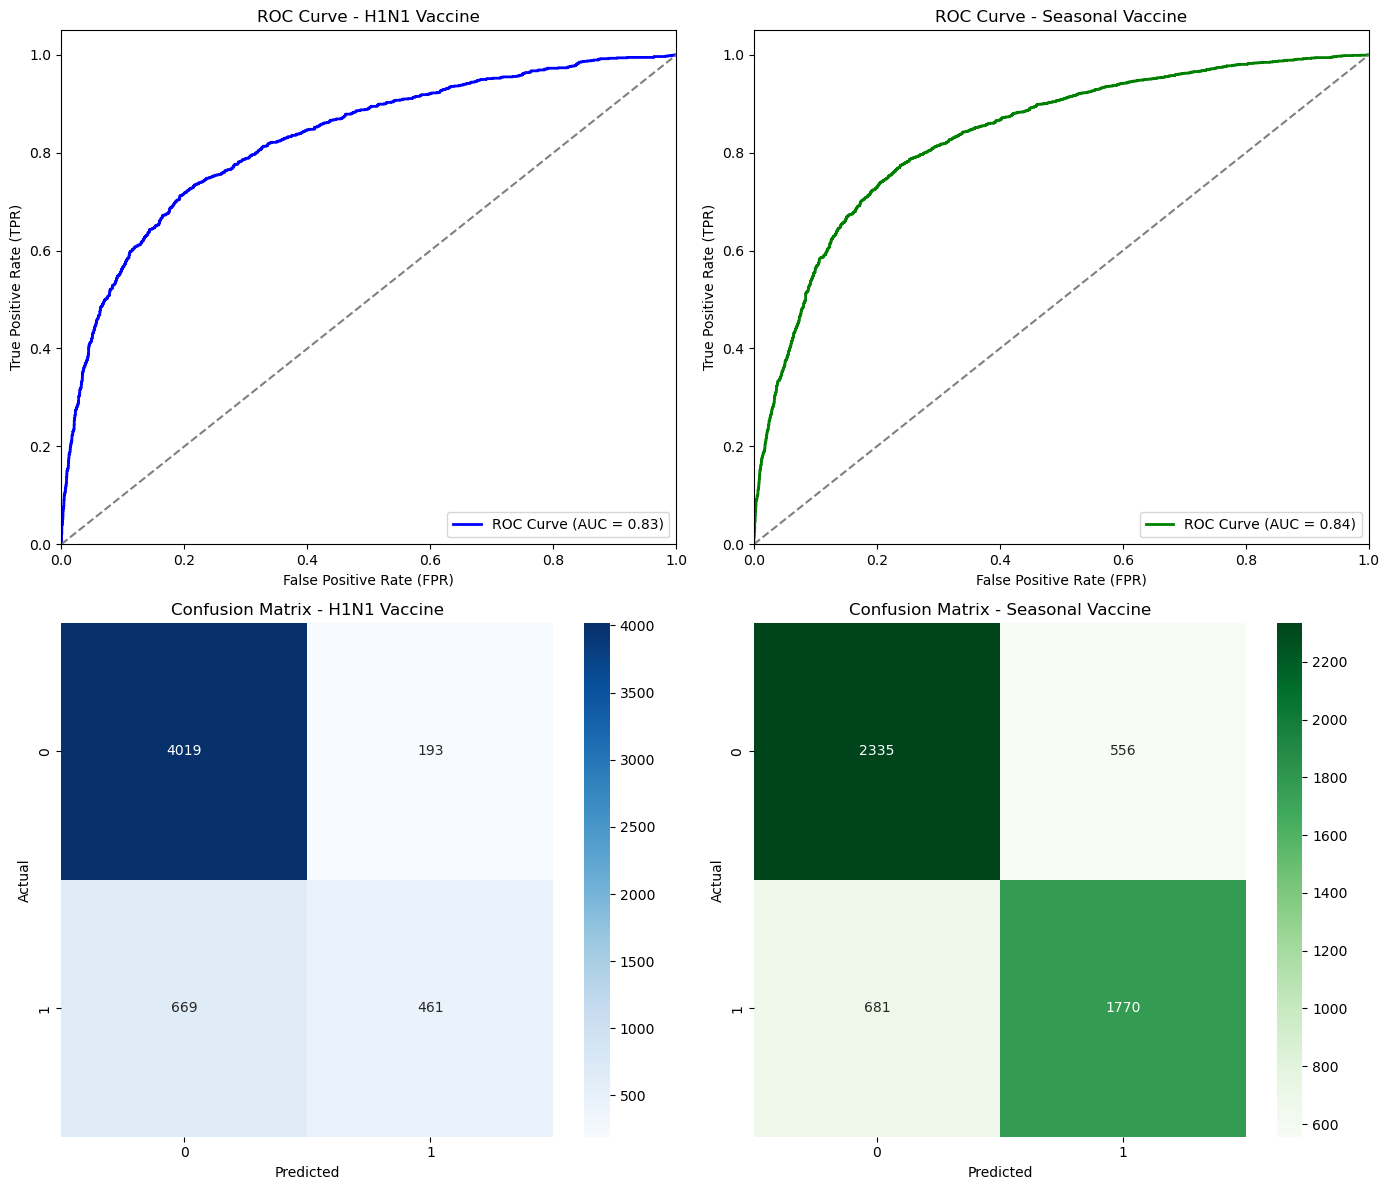

In [85]:
# Sample data 
features_numerical_df = features_df.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(features_numerical_df, labels_df, test_size=0.2, random_state=42)

# Apply SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

logreg = LogisticRegression(random_state=42)
multi_target_model = MultiOutputClassifier(logreg, n_jobs=-1)
multi_target_model.fit(X_train_scaled, y_train)

y_pred = multi_target_model.predict(X_test_scaled)
y_pred_proba = [model.predict_proba(X_test_scaled) for model in multi_target_model.estimators_]

# Output results
output(y_test, y_pred, y_pred_proba)